# Cargar bibliotecas
* numpy
* pyplot de matplotlib
* datasets de sklearn
* mplot3d de mpl_toolkits

Revisar ejemplos de https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits import mplot3d

Importar el conjunto de vinos


In [2]:
wines = datasets.load_wine()

In [3]:
dir(wines)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
#forma de los datos--
wines.data.shape

(178, 13)

In [6]:
#clases en el dataset
print(wines.target_names)

['class_0' 'class_1' 'class_2']


### Crear un vector con 3 elementos enteros que indiquen las 3 características que serán ocupadas en el resto del programa.

Este vector permitirá cambiar de características para otras ejecuciones.
Tener una variable (por ejemplo *X*) que contenga los 150 ejemplos del conjunto, pero únicamente con las 3 características seleccionadas.

In [7]:
features = [0,1,2]
#features = [3,4,5]
#features = [6,7,8]
#features = [10,11,12]

In [8]:
X = wines.data


In [9]:
X.shape

(178, 13)

In [10]:
wines.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
#     :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
Y = wines.target[:178:10]
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [12]:
#se pueden generar índices  para hacer más fácil la manipulación de los datos
indx0 = np.arange(0, 59)
indx1 = np.arange(59, 130)
indx2 = np.arange(130, 178)

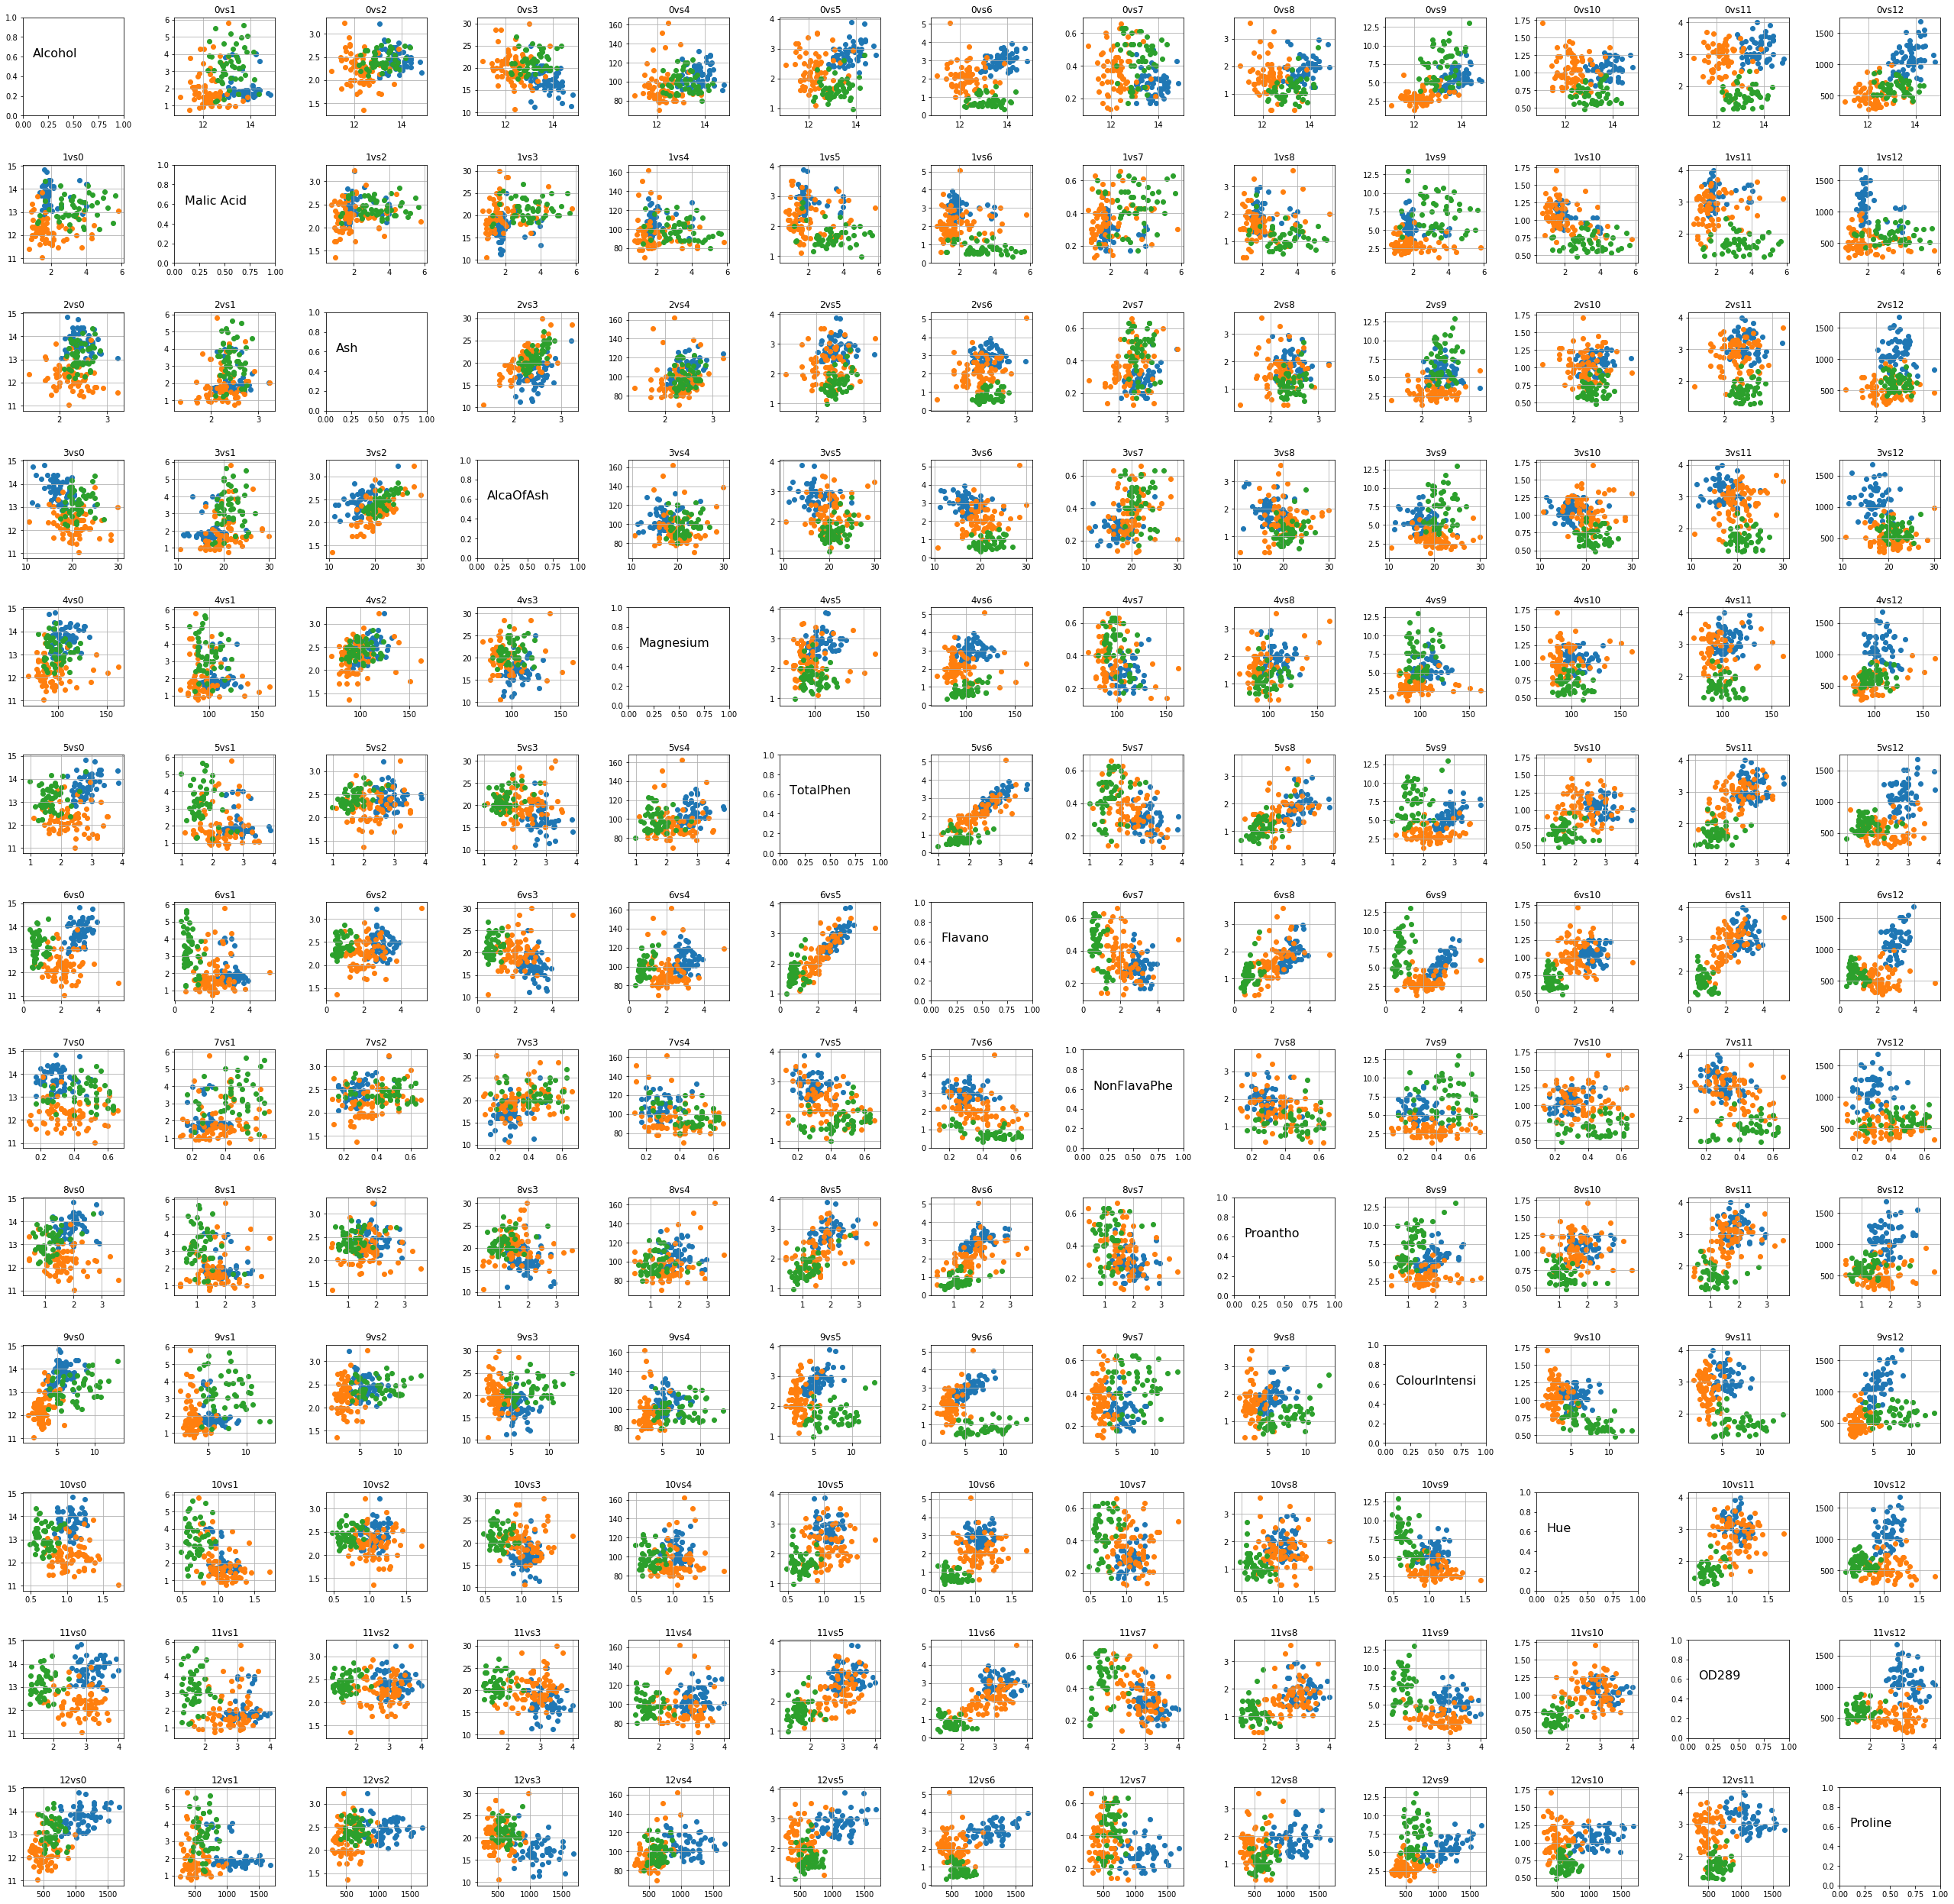

In [13]:
feats = ["Alcohol","Malic Acid","Ash","AlcaOfAsh","Magnesium","TotalPhen","Flavano","NonFlavaPhe","Proantho","ColourIntensi","Hue","OD289","Proline"]
#Configuración de las gráficas
plt.rcParams["figure.figsize"] = (45,45)
plt.subplots_adjust(hspace=0.5,wspace = 0.5)

posicion = 1
for i in range(13):
    for j in range(13):
        if i!=j:
            plt.subplot(13,13,posicion)
            plt.scatter(X[indx0,i],X[indx0,j])
            plt.scatter(X[indx1,i],X[indx1,j])
            plt.scatter(X[indx2,i],X[indx2,j])
            plt.grid()
            plt.title(str(i) + "vs" + str(j))
        else:
            plt.subplot(13,13,posicion)
            plt.text(0.1,0.6,feats[i],fontsize=16)
        posicion += 1

In [14]:
#pueden ocupar la misma semilla 
np.random.seed(10)

In [15]:
#columnas con las que se desea trabajar (identificar a partir de la gráfica anterior)
cols = [0,1,2]
#Tomare la 0, 11 y 12
cols = [7,11,12]

In [16]:
normalizador = MinMaxScaler()
#X = wines.data[:, cols]
X = normalizador.fit_transform( wines.data )
X = X[:, cols]

Generar la siguiente gráfica según eejmplos de la página citada con anterioridad

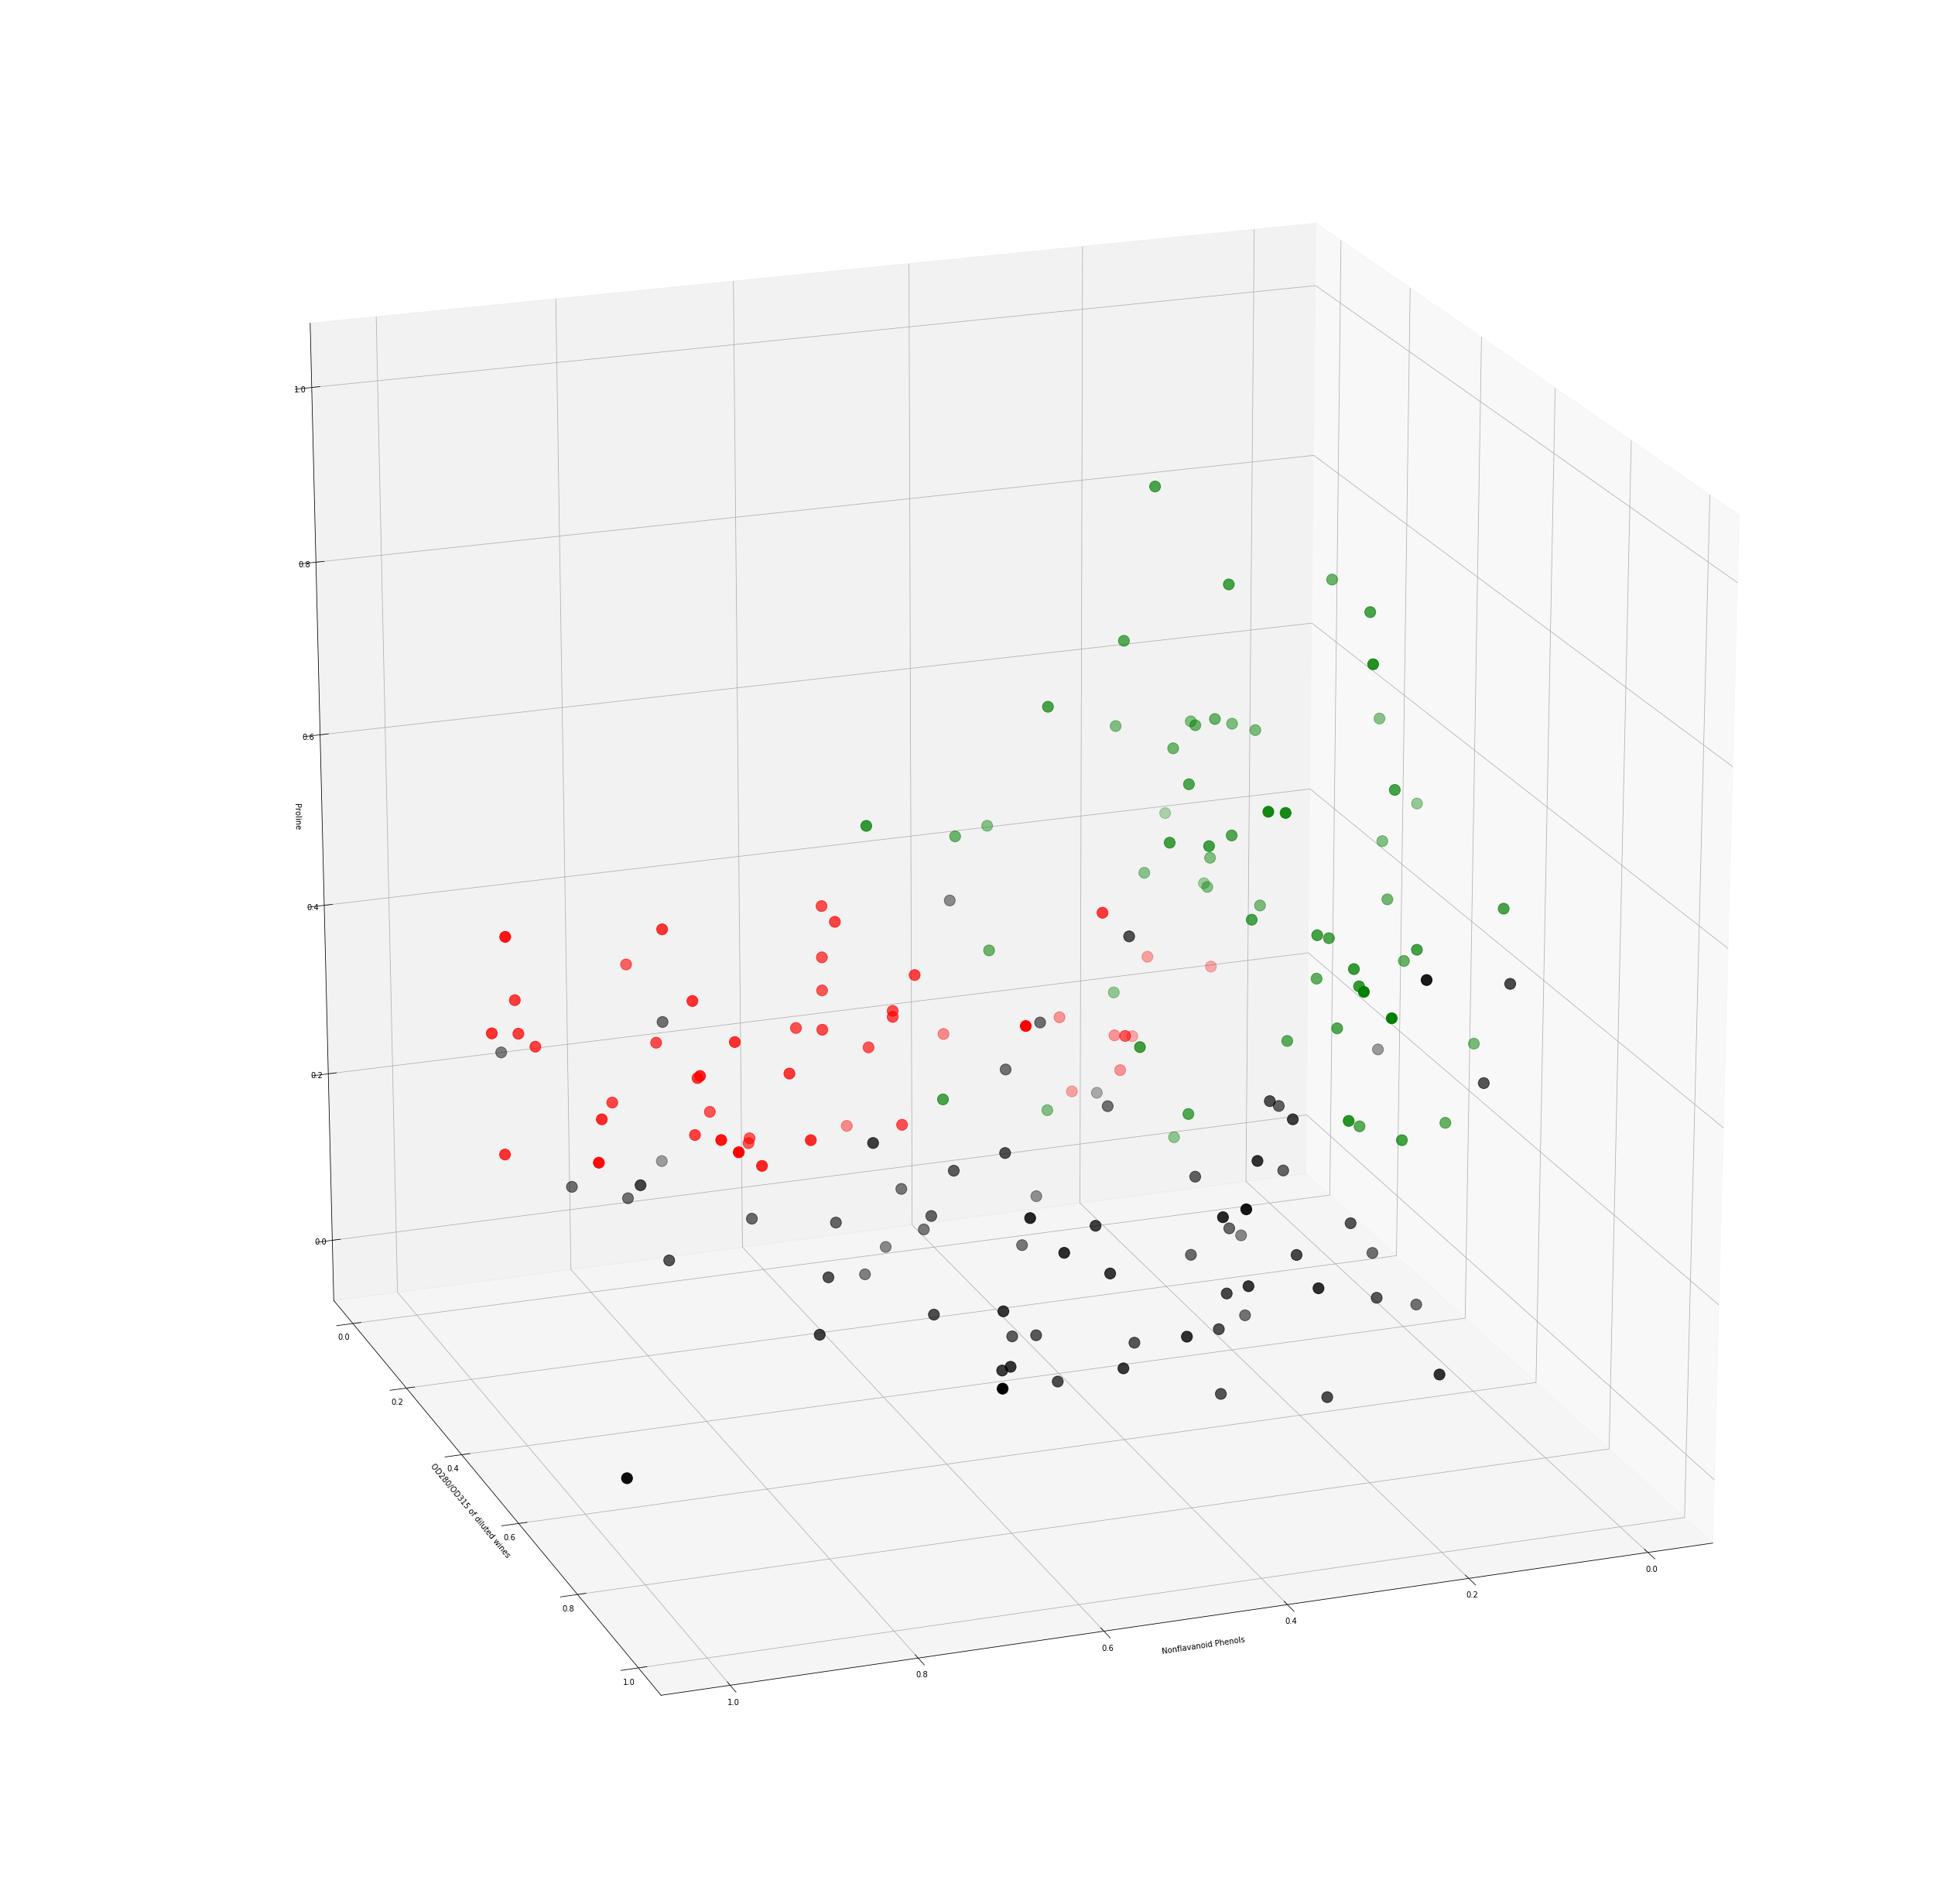

In [17]:
# Mostrar  una gráfica 3D con las características seleccionadas.
#fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(X[indx0,0], X[indx0,1], X[indx0,2],s=200, color = 'green');
ax.scatter3D(X[indx1,0], X[indx1,1], X[indx1,2],s=200, color='black');
ax.scatter3D(X[indx2,0], X[indx2,1], X[indx2,2],s=200, color = 'red');
ax.set_xlabel("Nonflavanoid Phenols")
ax.set_ylabel("OD280/OD315 of diluted wines")
ax.set_zlabel("Proline")
ax.view_init(20,70)

* Concatenar una columna con 1s al vector X para el bias.
* dejar en X únicamente elementos de 2 clases. Para esto, es importante que pruebe con la 1a clase y la 2a, la 2a y la 3a, etc.


In [18]:
# todos los elementos (sin la columna de unos) -- mostrar de 10 en 10,  15 en 15 etc
print(X[::10])
print("\n")
print(X[::15])

[[0.28301887 0.97069597 0.56134094]
 [0.16981132 0.6959707  0.87874465]
 [0.20754717 0.89377289 0.35805991]
 [0.30188679 0.52747253 0.71825963]
 [0.39622642 0.77289377 0.36875892]
 [0.0754717  0.6007326  0.62196862]
 [0.94339623 0.14652015 0.28673324]
 [0.45283019 0.2014652  0.42225392]
 [0.32075472 0.67765568 0.        ]
 [0.73584906 0.36630037 0.14407989]
 [0.24528302 0.61904762 0.30813124]
 [0.20754717 0.56410256 0.20256776]
 [0.35849057 0.77655678 0.24750357]
 [0.1509434  0.00732601 0.2510699 ]
 [0.75471698 0.38095238 0.2296719 ]
 [0.16981132 0.01098901 0.15834522]
 [0.69811321 0.11355311 0.17261056]
 [0.50943396 0.20512821 0.16547789]]


[[0.28301887 0.97069597 0.56134094]
 [0.32075472 0.58974359 0.7360913 ]
 [0.30188679 0.52747253 0.71825963]
 [0.32075472 0.75457875 0.57203994]
 [0.94339623 0.14652015 0.28673324]
 [0.39622642 0.31868132 0.10699001]
 [0.73584906 0.36630037 0.14407989]
 [1.         0.74358974 0.02639087]
 [0.35849057 0.77655678 0.24750357]
 [0.94339623 0.11355311 0

In [19]:
#forma de los datos

In [20]:
bias = np.ones(178)
bias = bias.reshape(178,1)
print(bias.shape)
print(X.shape)

(178, 1)
(178, 3)


In [21]:
X = np.concatenate((bias,X),axis=1)
X.shape

(178, 4)

In [22]:
# Mostrar los datos con la columna de 1s
print(X)

[[1.         0.28301887 0.97069597 0.56134094]
 [1.         0.24528302 0.78021978 0.55064194]
 [1.         0.32075472 0.6959707  0.64693295]
 [1.         0.20754717 0.7985348  0.85734665]
 [1.         0.49056604 0.60805861 0.32596291]
 [1.         0.39622642 0.57875458 0.83594864]
 [1.         0.32075472 0.84615385 0.72182596]
 [1.         0.33962264 0.84615385 0.7253923 ]
 [1.         0.30188679 0.57875458 0.54707561]
 [1.         0.16981132 0.83516484 0.54707561]
 [1.         0.16981132 0.6959707  0.87874465]
 [1.         0.24528302 0.56776557 0.7146933 ]
 [1.         0.30188679 0.5970696  0.74322397]
 [1.         0.56603774 0.53479853 0.62196862]
 [1.         0.30188679 0.63369963 0.90513552]
 [1.         0.32075472 0.58974359 0.7360913 ]
 [1.         0.37735849 0.50549451 0.7146933 ]
 [1.         0.50943396 0.47619048 0.60770328]
 [1.         0.35849057 0.56776557 1.        ]
 [1.         0.0754717  0.76556777 0.40442225]
 [1.         0.20754717 0.89377289 0.35805991]
 [1.         

In [23]:
#ejemplos para que se orienten
np.arange(15)[-5:]

array([10, 11, 12, 13, 14])

In [24]:
np.arange(15)[5]

5

In [25]:
#Tomar clase 0 y 2
X = np.concatenate( (X[indx0,:],X[indx2,:]) )
#Clase 0 y 1
#X = np.concatenate( (X[indx0,:],X[indx1,:]) )
#Clase 1 y 2
#X = np.concatenate( (X[indx1,:],X[indx2,:]) )
X.shape

(107, 4)

El vector *Y* deberá tener +1 para elementos de una clase y -1 para la otra clase. Recuerde que este ejercicio es de clasificación binaria.
* Para este problema varía la cantidad de elementos en cada clase, considere esto para generar este vector.
* Recordar que para este ejemplo, ya no son 50 de cada clase, ya hay cantidades diferentes para cada clase.


In [26]:
#Class_0 (-1)[0-59] y Class_2 (+1)[59-107]
Y = np.arange(107) #-----CHANGE--------
Y = (Y >= 59)*2-1 #-----CHANGE--------
print(Y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1]


Genere un vector de pesos para ocupar en el algoritmo de entrenamiento.

In [27]:
W = np.random.uniform(low = -0.2,high = 0.2, size = 4)
W.shape

(4,)

### Definir la función signo

In [28]:
def signo(x):
    return (x>=0) * 2 -1 

## Ejecutar el algoritmo del perceptrón. 

Debe guardar en una variable todos los valores de *W*, para generar la gráfica que se pedirá a continuación $\rightarrow$ *historia*.
* Considere una variable *niters* para llevar el número de iteraciones, ésta servirá para saber el número de cambios que sufrió *W*.
* Llevar la historia de los pesos y de la precisión de clasificación, por lo que deberá calcularse la precisión del perceptrón contra los elementos de las 2 clases que se están trabajando en cada iteración.


In [29]:
print(W)
factor = 0.2 #Sirve para la actualización de los pesos
niters = 100
history = np.array([W])
rendimientos = np.array([])
for i in range(niters):
    #Número aleatorio
    j = np.random.randint(0,100,1) 
    #Multiplicacion
    v = X[j,:].dot(W.T)
    #Funcion de activacion, valor obtenido
    y = signo(v)
    #Actualización de los pesos
    W = W + factor * (Y[j] - y) * X[j,:]
    #Guardar vector de pesos
    history = np.append(history,W,axis = 0)
    
    #Calcular rendimiento del peso actual
    respuesta = signo(X.dot(W.T).reshape(107)) #-----CHANGE--------
    performance = (respuesta == Y).mean()
    #Guardar rendimientos
    rendimientos = np.append(rendimientos,performance)
    if(i > 0 and performance > rendimientos[i-1]):
        best_W = W
        best_i = i
        best_pfm = performance
print(W)

[ 0.10852826 -0.19169922  0.05345929  0.09952155]
[[ 0.10852826  0.06490455 -0.37730994 -0.27565676]]


In [30]:
 #mostrar para algunos (de 10 en 10, por ejemplo) los aciertos/errores de clasificación.
some = X[::10].dot(W.T)
print("ejemplos X = \n",some,"\n")
#print(signo(some).reshape(11).shape)
#print(Y[:11].shape)
#print("Ciertos/Falsos: \n",signo(some).reshape(11) == Y[:11])

ejemplos X = 
 [[-0.39409319]
 [-0.38527878]
 [-0.31393202]
 [-0.26889167]
 [-0.25902623]
 [-0.28468552]
 [ 0.05172026]
 [-0.12663316]
 [ 0.05464066]
 [-0.0012158 ]
 [ 0.06388417]] 



Revise cómo quedó el vector W, el vector de historia

In [31]:
#último W
print(W," ",W.shape)

[[ 0.10852826  0.06490455 -0.37730994 -0.27565676]]   (1, 4)


In [32]:
#Mejor W, dimensión, índice del mejor W y precisión de mejor clasificación
print("W = ",best_W,"\nDimensión = ",W.shape,"\ni = ",best_i,"\nRendimiento",best_pfm)

W =  [[ 0.10852826  0.06490455 -0.37730994 -0.27565676]] 
Dimensión =  (1, 4) 
i =  92 
Rendimiento 0.8411214953271028


### Muestre cómo cambio la variable de historia del vector W y genere una gráfica que muestre cómo cambiaron los valores de los pesos de la neurona.

Historia de los pesos W

In [33]:
 print(history)

[[ 0.10852826 -0.19169922  0.05345929  0.09952155]
 [ 0.50852826  0.08754606  0.09888054  0.16856578]
 [ 0.50852826  0.08754606  0.09888054  0.16856578]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.2410462  -0.0474114 ]
 [ 0.10852826 -0.01056714 -0.24

In [34]:
history[:-1,0].shape

(100,)

Text(0, 0.5, 'Pesos')

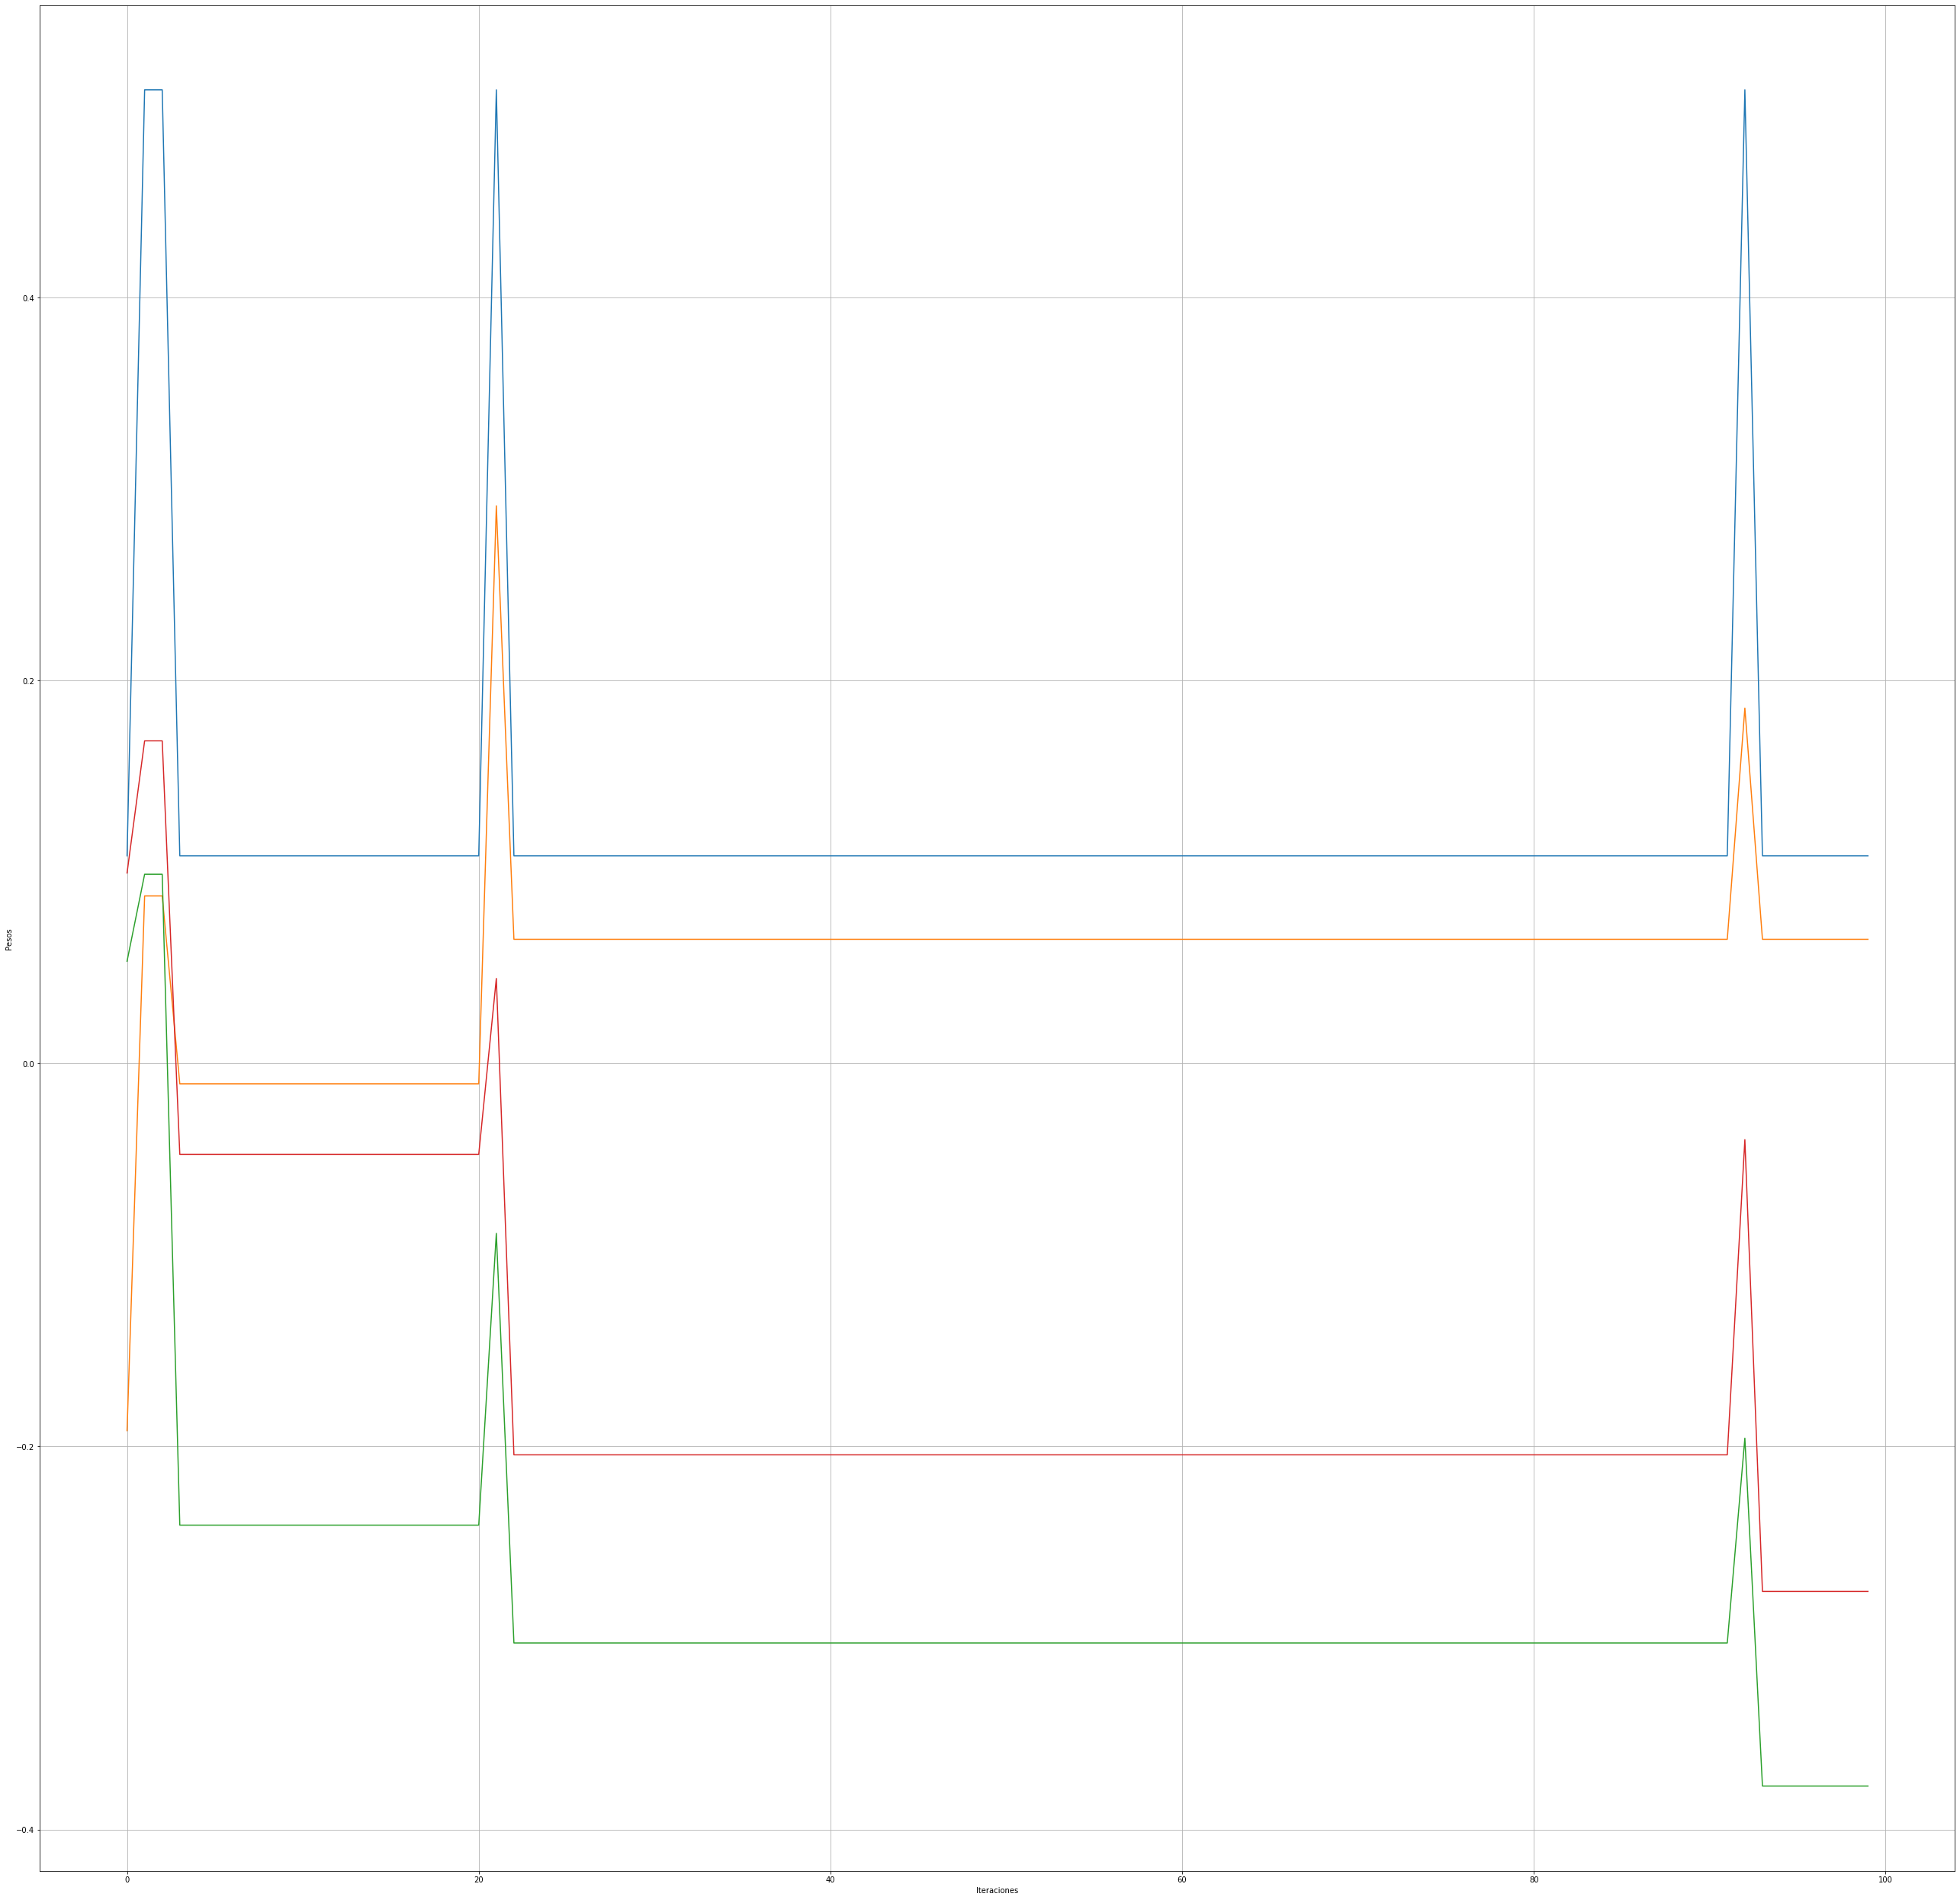

In [35]:
plt.plot(np.arange(niters),history[:-1,0])
plt.plot(np.arange(niters),history[:-1,1])
plt.plot(np.arange(niters),history[:-1,2])
plt.plot(np.arange(niters),history[:-1,3])
plt.grid()
plt.xlabel("Iteraciones")
plt.ylabel("Pesos")

## Mostrar el cambio de la precisión de la clasificacion


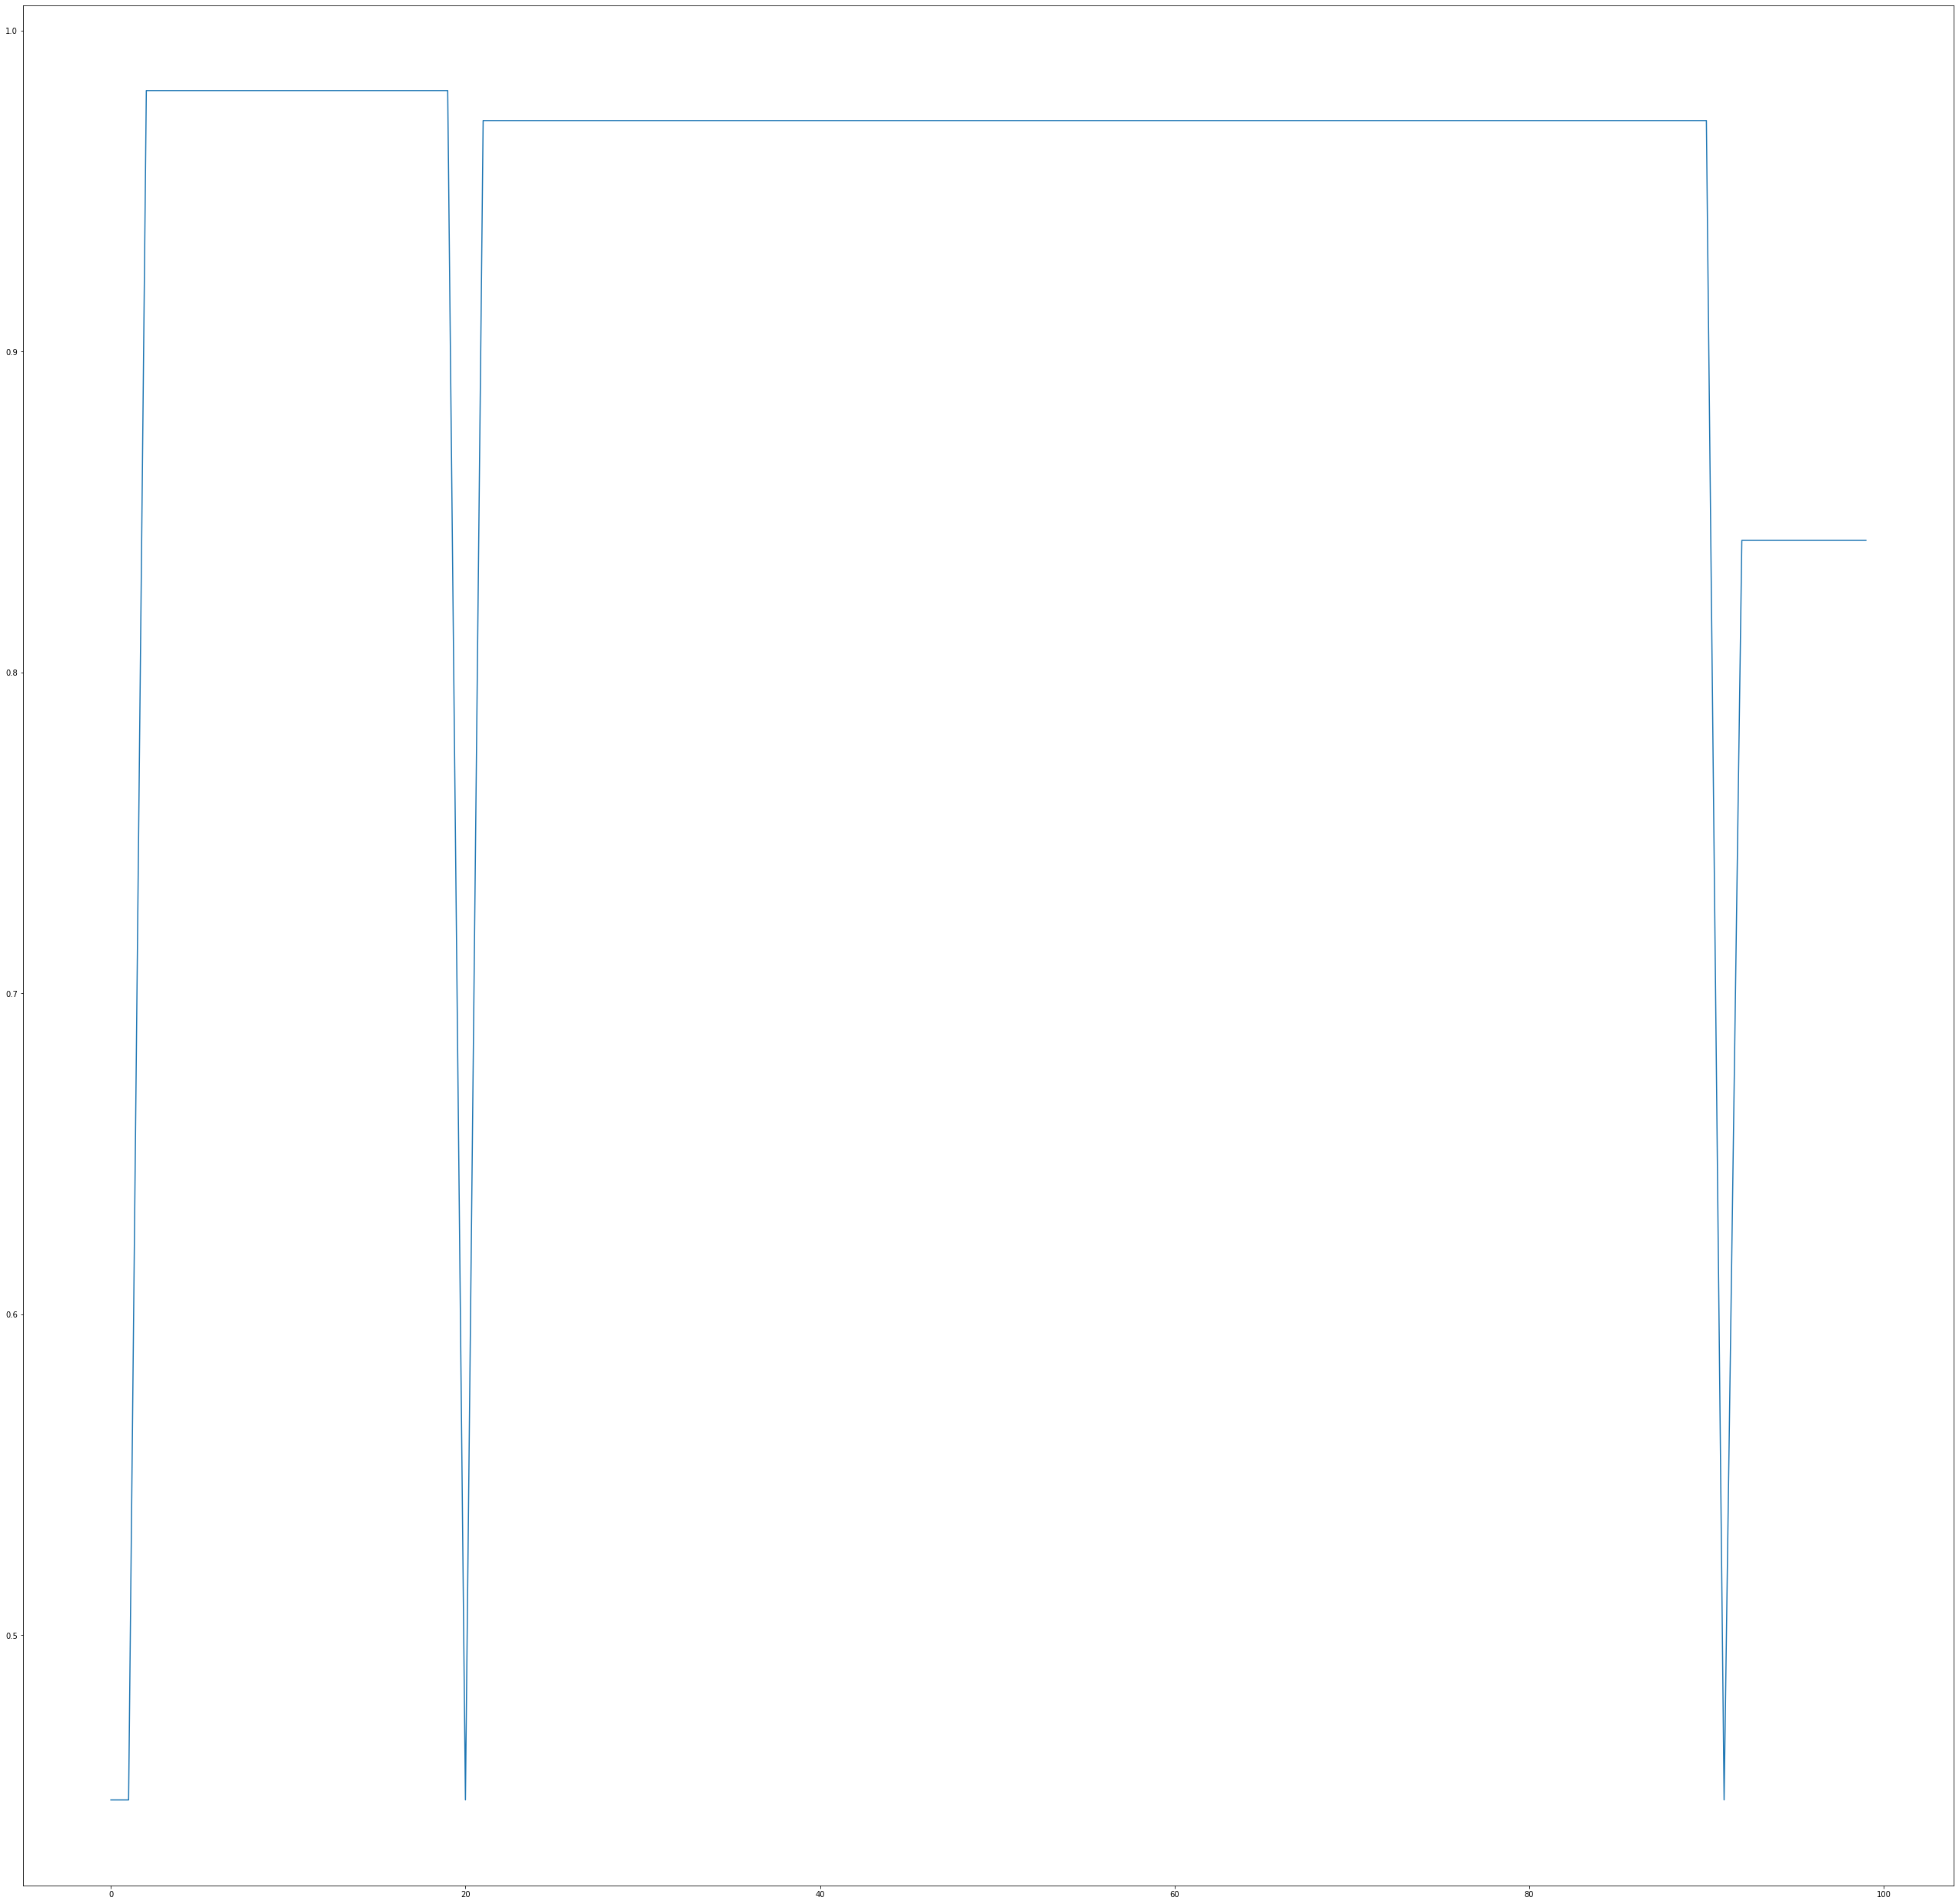

In [36]:
 plt.plot(np.arange(niters),rendimientos)

In [37]:
X.min(axis = 0)[1]

0.07547169811320756

In [38]:
#maximos y minimos para saber los rangos de impresión
minimos = X.min(axis = 0)
maximos = X.max(axis = 0)
print(minimos,"\n",maximos)

[1.         0.0754717  0.         0.09771755] 
 [1.         0.94339623 1.         1.        ]


In [39]:
#generación de las mallas de X y Y para el plano
x = np.linspace(minimos[1],maximos[1],5)
y = np.linspace(minimos[2],maximos[2],5)
print(x)
print(y)
xx,yy = np.meshgrid(x,y)

[0.0754717  0.29245283 0.50943396 0.72641509 0.94339623]
[0.   0.25 0.5  0.75 1.  ]


In [40]:
xx

array([[0.0754717 , 0.29245283, 0.50943396, 0.72641509, 0.94339623],
       [0.0754717 , 0.29245283, 0.50943396, 0.72641509, 0.94339623],
       [0.0754717 , 0.29245283, 0.50943396, 0.72641509, 0.94339623],
       [0.0754717 , 0.29245283, 0.50943396, 0.72641509, 0.94339623],
       [0.0754717 , 0.29245283, 0.50943396, 0.72641509, 0.94339623]])

In [41]:
yy

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

## Generar la ecuación para el plano que divide a las 2 clases seleccionadas 

In [42]:
#aplicando ecuacion  para plano con la mejor W
print(best_W.shape)
zz = ( (-1) * (best_W[0][0] + best_W[0][1] * xx + best_W[0][2] * yy) ) / best_W[0][3]
zz

(1, 4)


array([[ 0.41147807,  0.4625672 ,  0.51365633,  0.56474546,  0.61583458],
       [ 0.06928627,  0.1203754 ,  0.17146453,  0.22255366,  0.27364278],
       [-0.27290553, -0.2218164 , -0.17072727, -0.11963815, -0.06854902],
       [-0.61509733, -0.5640082 , -0.51291907, -0.46182995, -0.41074082],
       [-0.95728913, -0.9062    , -0.85511087, -0.80402175, -0.75293262]])

## Muestre una gráfica con los datos de las 2 clases usando scatter3D y el plano que las separa, éste obtenido de los pesos del perceptrón.

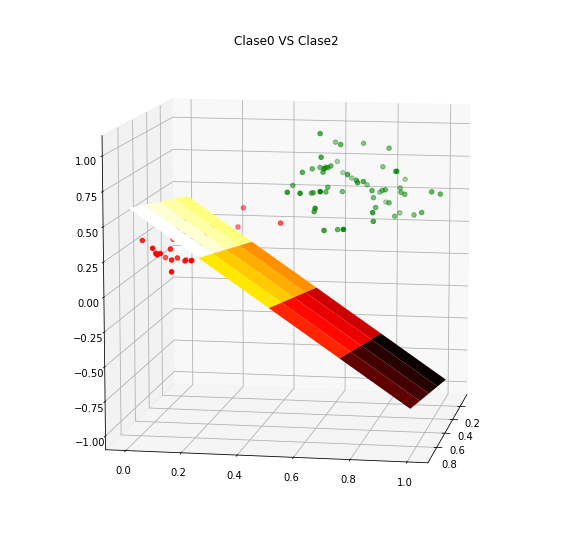

In [44]:
#mostrar en 3D el plano generado
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = plt.axes(projection = '3d')
clss0 = np.arange(0,59)
clss1 = np.arange(59,107)
ax.scatter3D( X[clss0,1],X[clss0,2],X[clss0,3], color = 'green')
ax.scatter3D( X[clss1,1],X[clss1,2],X[clss1,3], color = 'red')
ax.set_title("Clase0 VS Clase2")
ax.plot_surface(xx,yy,zz,cmap = 'hot')
ax.view_init(10,10)

Repetir el experimento (generar las gráficas principalmente de los planos que separan y de la precisión de clasificación):
* clase 0 vs 1
* clase 1 vs 2
* clase 0 vs 2

(todas las posibles combinaciones)

Esto es para entregar como otra práctica más.